# TP 2. PARTIE 1. scikit-learn + Naive Bayes

<img src="http://media.giphy.com/media/2lbhL8dSGMh8I/giphy.gif"  width="200">


Le module de Machine Learning en Python : scitkit-learn (sklearn)
http://scikit-learn.org/stable/

## Plan :

   [- Iris dataset](#1)
   
   [- Naive Bayes](#2)
   
   [- Mon Naive Bayes](#3)
   
   [- Tests](#4)

In [14]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

<img src="http://78.media.tumblr.com/ec97315a70ebd605ac05f3b91feadaa5/tumblr_monmpxBfcM1qirapio1_500.gif" width = 200>
<a id="1"></a> 
 
# 1. Iris dataset


On va chercher le dataset **iris** dans le module sklearn

In [15]:
from IPython.display import clear_output
clear_output(wait=True)

In [16]:
from sklearn import datasets
iris = datasets.load_iris()

In [17]:
type(iris)

sklearn.utils.Bunch

In [18]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [19]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [20]:
type(iris.data)

numpy.ndarray

In [21]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [22]:
type(iris.target)

numpy.ndarray

In [23]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<img src="http://media.giphy.com/media/c1zviFHCf4pq0/giphy.gif" width = 200>
<a id="2"></a> 
 
# 2. Naive Bayes


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  class_count_ : array, shape (n_classes,)
 |      number of training samples observed in each class.
 |  
 |  theta_ : array, shape (n_classes, n_features)
 |      mean of eac

In [26]:
gnb = GaussianNB()
help(gnb.fit)

Help on method fit in module sklearn.naive_bayes:

fit(X, y, sample_weight=None) method of sklearn.naive_bayes.GaussianNB instance
    Fit Gaussian Naive Bayes according to X, y
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : array-like, shape (n_samples,)
        Target values.
    
    sample_weight : array-like, shape (n_samples,), optional (default=None)
        Weights applied to individual samples (1. for unweighted).
    
        .. versionadded:: 0.17
           Gaussian Naive Bayes supports fitting with *sample_weight*.
    
    Returns
    -------
    self : object
        Returns self.



In [27]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
       % (iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 6


In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
gnb.fit(iris.data, iris.target)

GaussianNB(priors=None)

In [31]:
iris.data.shape

(150, 4)

In [32]:
train = np.random.choice(range(150), 75, replace=False)
train

array([ 31,  38, 126,  26,  22,  37,  19,  87,  82,  95,  35, 122, 104,
        16,  78,   7,  21,  36,  24,  44,  69, 108, 123,  55,   9,  40,
        14,   6,   2, 128,  59,  41, 143,  91,  46, 145, 133,  11,  76,
        39,  80,  65, 142,  29,  99, 141,  84,  81,  94, 127,  52, 117,
        27, 121,  51, 139,  83, 114,  73,   0, 144, 147,  97,  96,  33,
        86,  77,  57, 120,  23,   1, 103,  54,  53, 109])

In [33]:
a = range(150)
test = np.delete(a, train)


In [34]:
train = np.random.choice(range(150), 20, replace=False)
a = range(150)
test = np.delete(a, train)
y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
(iris.target[test,] != y_pred).sum()/len(test)


0.08461538461538462

In [35]:
def NB(A,B,nb):
    res = []
    for i in range(B-A+1):
        temp = 0
        for j in range(nb):
            train = np.random.choice(range(150), A+i, replace=False)
            a = range(150)
            test = np.delete(a, train)
            y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
            temp = temp +(iris.target[test,] != y_pred).sum()/len(test)
        res = res + [100*temp/nb]
    return res


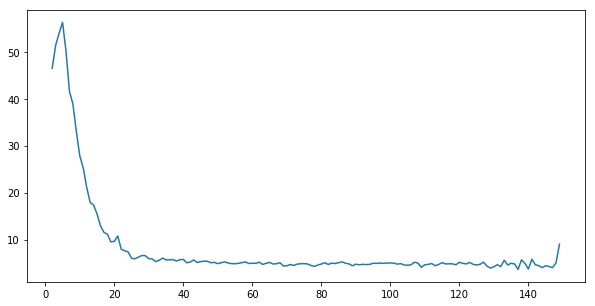

In [36]:
A = 2
B = 149
plt.figure(figsize=(10,5))
plt.plot(np.linspace(A,B,B-A+1), NB(A,B,100))

<img src="http://media3.giphy.com/media/KYMR9VsDGs3PW/giphy.gif" width = 200>
<a id="3"></a> 
 
# 3. Mon Naive Bayes

In [43]:
def MonNaiveBayes(train, test):
    #TARGET
    unique, counts = np.unique(train.target, return_counts=True)
    freq = counts/len(train.target)
    dic = dict(zip(unique, freq)) 
    estimM = np.zeros(shape=(len(unique),train.data.shape[1]))
    estimV = np.zeros(shape=(len(unique),train.data.shape[1])) 
    #DATA : estimation
    i = 0
    for tar in unique:
        estimM[i,] = np.apply_along_axis(np.mean, 0, train.data[train.target == tar,])
        estimV[i,] = np.apply_along_axis(np.var, 0, train.data[train.target == tar,])
        i = i+1

    choice = np.zeros(shape=(test.data.shape[0],len(unique)))
    #DATA : test 
    for i in range(test.data.shape[0]):
        for j in range(len(unique)):
            choice[i,j] = -0.5*sum((test.data[i]-estimM[j])*(test.data[i]-estimM[j])/estimV[j]) + np.log(freq[j]) 
    res = np.argmax(choice, axis=1)
    return res

In [40]:
MonNaiveBayes(iris, iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [41]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
y_pred == MonNaiveBayes(iris, iris)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [42]:
import copy
iris2 = copy.deepcopy(iris)

iris2.data = iris2.data[3:30,]
iris2.target = iris2.target[3:30,]
MonNaiveBayes(iris, iris2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

<img src="http://media2.giphy.com/media/GgtcDmMa97FhC/200.gif" width = 200>
<a id="3"></a> 
 
# 3. Tests